## Lab 2: Classification Using KNN and RNN Algortihm
Anna Bottu

MSCS-634: Advanced Big Data and Data Mining

# Step 1: Load and Prepare the Dataset

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the Wine Dataset form sklearn
#Need to import sklearn.datasets library to use it
from sklearn import datasets

#loads the wine dataset and saves it as data
#gets the data as a dataframe so it is easier to analyze the data
data = datasets.load_wine(as_frame=True)
df = data.frame
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

## Data Exploration for feature details

In [5]:
#inspecting the columns
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [6]:
#gets a summary of the statistics such as mean, min, max, std
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
#prints 5 rows to look at the values you are working with 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
#checks to see what the data types are and if any values are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### As you can see above, there are 14 columns where all the first 13 columns are float data type and the last column is int data type with no null values

In [9]:
#another check for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### As you can see there are no missing values in any of the columns 

## Data Exploration for Class Distribution

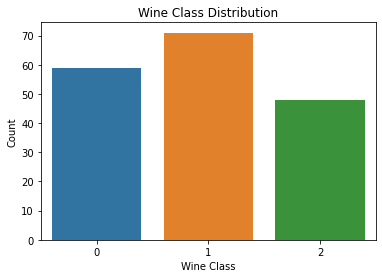

In [10]:
#creates a count plot of how many samples are in each class
sns.countplot(x='target', data=df)
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

In [11]:
#gives the exact number of examples of each class
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

#### As we can see although the dataset is not perfectly balanced it is reasonably balanced

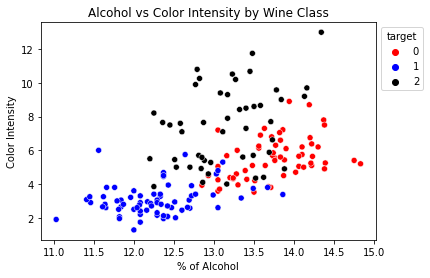

In [12]:
#creates a scatterplot to look at the relationship between the color of the wine and the percentage of alcohol
sns.scatterplot(x='alcohol', y='color_intensity', hue='target', data=df, palette={0: 'red', 1: 'blue', 2: 'black'})

plt.title('Alcohol vs Color Intensity by Wine Class')
plt.xlabel('% of Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='target', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#### From the scatterplot above, we can conclude that most of the samples from class 1 of the wines have lower percentage of alcohol between 11.0 - ~13.0% and their colro intensity is between 0 - 6, so they are probably white vines. Most of the samples from class 0 have higher percentage of alcohol they are between 13.0 - 15.0% and most of them have a color intensity of lesser than 6 . We can also say that most of samples from class 2 are more intense in the color of the wine.

#### Split the dataset into 80% training and 20% testing sets

In [14]:
X = data.data
y = data.target

In [15]:
print(X)


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [16]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [17]:
#used for train and test sets
from sklearn.model_selection import train_test_split

#splits the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [18]:
print("training: ", X_train.shape[0])
print("testing: ", X_test.shape[0])

training:  142
testing:  36


# Step 2 : Implement K-Nearest Neighbors (KNN) 

#### The KNN algorithm uses distance to make predictions

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#store the k values in an array so we can loop through this array and add k value to neighbor classifier
k_values = [1, 5, 11, 15, 21]
KNN_results = []

In [31]:
#loop through each k value 
for k in k_values:
    #creates an instance of the KNN model
    KNN = KNeighborsClassifier(n_neighbors = k)
    #fit to the training data
    KNN.fit(X_train, y_train)
    #make predictions on the test dataset
    y_pred = KNN.predict(X_test)
    #check the predicition against the actual values
    KNN_accuracy = accuracy_score(y_test, y_pred)
    print("K value: ", k, "Accuracy: ", KNN_accuracy)
    #adds all the accuracy of the different k values to the KNN_results array
    KNN_results.append(KNN_accuracy)

K value:  1 Accuracy:  0.7777777777777778
K value:  5 Accuracy:  0.7222222222222222
K value:  11 Accuracy:  0.75
K value:  15 Accuracy:  0.75
K value:  21 Accuracy:  0.7777777777777778


In [21]:
print(KNN_results)

[0.7777777777777778, 0.7222222222222222, 0.75, 0.75, 0.7777777777777778]


#### Based on the KNN results above, the model shows better perforamce when the k calues is 1 or 21, both achiving an accuracy of ~0.78. This suggests that the model perforams consistently well whether is considers only a few neighbos or many, indicating that its accuracy is relatively insensitive to the specific number of neighbors chosen. 

# Step 3: Implement Radius Neighbors (RNN)

#### RNN algorithm measures how far a specific data point is from every other point in the dataset

In [22]:
from sklearn.neighbors import RadiusNeighborsClassifier

#store the radius values in an array so we can loop through this array and add the radius value 
radius_values = [350, 400, 450, 500, 550, 600]
RNN_results = []

In [32]:
#loop through each radius value
for r in radius_values:
    #creates an instance of the RNN model
    RNN = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    #fit to the training data
    RNN.fit(X_train, y_train)
    #make predictions on the test dataset
    y_pred = RNN.predict(X_test)
    #check the predicitions against the actual values
    accuracy = accuracy_score(y_test, y_pred)
    print("Radius value: ", r, "Accuracy: ", accuracy)
    #adds all the different radius value accuracies to the RNN_results array
    RNN_results.append(accuracy)

Radius value:  350 Accuracy:  0.75
Radius value:  400 Accuracy:  0.7222222222222222
Radius value:  450 Accuracy:  0.7222222222222222
Radius value:  500 Accuracy:  0.7222222222222222
Radius value:  550 Accuracy:  0.7222222222222222
Radius value:  600 Accuracy:  0.7222222222222222


In [24]:
print(RNN_results)

[0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]


#### Based on the RNN results above, a radius of 350 yields the highest accuracy at 0.75, while larger radius values result in slightly lower accuracies around 0.72. This suggests that a radius of 350 captures a well balanced set of relevant neighbors, whereas larger radii likely introduces noice by including neighbors from different classes. 

# Step 4: Visualize and Compare Results

### Plot showing the accuracy trends for different k values in KNN

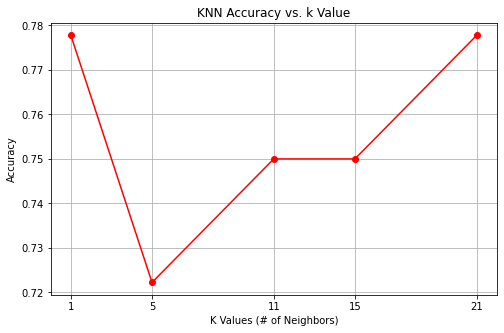

In [29]:
#creates a new figure
plt.figure(figsize=(8, 5))
#plots the accuracy of the differnt k values we used
plt.plot(k_values, KNN_results, marker='o', linestyle='-', color='red')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('K Values (# of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

## Plot showing the accuracy trends for different radius values in RNN

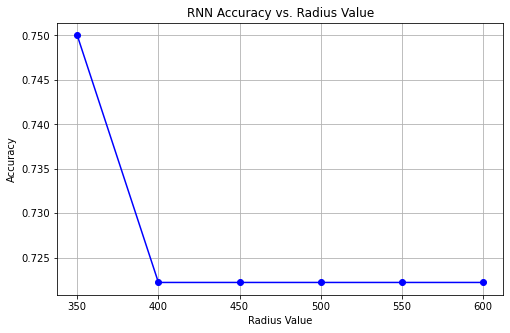

In [30]:
plt.figure(figsize=(8, 5))
#plots the accuracy of the different radius values we tested
plt.plot(radius_values, RNN_results, marker='o', linestyle='-', color='blue')
plt.title('RNN Accuracy vs. Radius Value')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(radius_values)
plt.show()

## Comparing the performace of KNN and RNN model

#### When comparing the performace of the KNN and RNN models, we observe that the KNN model achieves it's highest accuracy at ~0.78 at both k = 1 and 21, indicating stable and strong performace across a range of neighbors counts. This suggests that the KNN model is realtively insensitive to the number of neighbors selected, performing well with both few and many neighbors.

#### Where the RNN model achieves its highest accuracy 0.75 at a radius of 350, with perfroamce slightly declining to ~0.72 as the radius increases. This implies that smaller radii, like 350, are more effective at capturing relevant local neighbors, while larger radii may introduce noise by including too many distant points from other classes. 

#### Overall, I think the KNN algorithm performed better than RNN when is came down to the accuracy and performs well even when the number of neighbors changes, where in RNN algorithm it was more sensitive to the radius size. 

## When would KNN or RNN be better 

#### I think KNN model would be better is you need higher accuracy and need a model that is not as sensitive to the parameter changing. A KNN model would work best with a medium sized dataset where you have a good understanding of the dataset and you think a fixed number of neighbors will help you determine the class of a new data point. A RNN model would be best if you want to look at the neighbors in a certain radius, this would be best if you are dealing with a dataset that is spread out unevenly, that way you can use a radius to help you focus on a certain area. 